**Autor:** Andrej Gajdoš  <br> 
_[Ústav matematických vied](https://www.upjs.sk/prirodovedecka-fakulta/ustav/umv/), [Prírodovedecká fakulta](https://www.upjs.sk/prirodovedecka-fakulta/), Univerzita Pavla Jozefa Šafárika v Košiciach,_ <br> 
email: [andrej.gajdos@upjs.sk](mailto:andrej.gajdos@upjs.sk)
*** 

**_Tento materiál vznikol za podpory grantu VVGS-2022-2412._**

***

**<font size=6 color=gold> NUM: Téma 3 - Numerické derivovanie </font>** 

---

<a id=table_of_contents></a>
##  Obsah

* [Úvod](#uvod)


* [Aproximácia derivácií pomocou Taylorovej vety](#taylor) 


* [Aproximácia derivácií s využitím Lagrangeovej polynomiálnej reprezentácie](#lagrange) 


* [Analýza chýb](#chyby) 


* [Richardsonova extrapolácia](#richardson) 


* [Použité zdroje](#zdroje) 


**Pre návrat na obsah stlačte klávesu <font color=brown>Home</font>.** 

---

In [1]:
# nacitanie potrebnych balikov v Python-e 
import math 
import numpy as np 
import sympy as sym 
import scipy as sci 
import scipy.misc
from decimal import Decimal
from matplotlib import pyplot as plt

***
<a id=uvod></a>
 # <font color=brown> Úvod </font> 

**Približný výpočet derivácie $f'(x)$ funkcie $f(x)$ má zmysel napr. v týchto situáciách:** 

1. Pre dané $x$ môžeme získať odpovedajúcu hodnotu $f(x)$, avšak explicitné vyjadrenie funkcie $f(x)$ nemáme k dispozícii, a preto vzorec pre $f'(x)$ nevieme napísať; 


2. Funkcia $f(x)$ je taká zložitá, že výpočet jej derivácie je príliš pracný (náročný); 


3. Hodnoty funkcie $f(x)$ poznáme iba v niekoľkých bodoch. 

---

#### Poznámka 1 

**Základná myšlienka je nahradiť pôvodnú funkciu $f(x)$ vhodnou aproximáciou $\phi(x)$, ktorá sa potom derivuje, tzn. hodnota derivácie $\phi'(x)$ sa považuje za približnú hodnotu $f'(x)$ (podobne pri deriváciách vyšších rádov).** Ak sú hodnoty $y_i=f(x_i)$ získané meraním, je vhodné dáta najprv vyrovnať (vyhladiť), t. j. $\phi$ získame metódou najmenších štvorcov. Pokiaľ je funkcia $f(x)$ zadaná presnými hodnotami $y_i=f(x_i)$ vo veľkom počte uzlov, potom je rozumné určiť $\phi$ ako po častiach polynomický interpolant. Ak je uzlov málo, je možné vziať za $\phi$ Lagrangeov alebo Hermitov polynóm nízkeho stupňa (prípadne využiť Barycentrickú interpoláciu). <br/> 
Inou alternatívou pre aproximovanie derivácie môže byť využitie Taylorovho vzorca a to za predpokladu (okrem iných), že vieme rozumne určiť funkčné hodnoty $f(x)$.  

--- 

Spomeňme si, že derivácia funkcie $f$ v bode $x_0$ je definovaná nasledovne: 

$$f'(x_0)=\lim\limits_{h\to0}\dfrac{f(x_0+h)-f(x_0)}{h}.$$ 

Tento vzťah poskytuje spôsob ako aproximovať $f'(x_0)$. Stačí vypočítať hodnotu výrazu 

$$\dfrac{f(x_0+h)-f(x_0)}{h}$$

pre malé $h$. Ide o aproximáciu derivácie, ktorej sa tiež hovorí **aproximácia prvého rádu** (chyba je v tomto prípade $\mathcal{O}(h)$ - viď nižšie). Táto aproximácia však nemusí byť dostatočne presná kvôli zaokrúhľovacej chybe (*round-off error* - zapríčinená limitovanou strojovou presnosťou t. j. rozdiel medzi aproximáciou čísla použitého pri výpočte a jeho presnou (správnou) hodnotou). 

K tejto jednoduchej aproximácii je možné sa dopracovať aj využitím Taylorovho radu, ktorý však poskytuje i presnejšie aproximácie ... 

***
<a id=taylor></a>
 # <font color=brown> Aproximácia derivácií pomocou Taylorovej vety </font> 

Predpokladajme $f\in C^2\langle a,b \rangle$. Aplikovaním Taylorovho vzorca chceme aproximovať $f'(x_0)$ pre $x_0\in(a,b)$. Podľa Taylorovej vety platí 

$$f(x)=f(x_0)+f'(x_0)(x-x_0)+\dfrac{(x-x_0)^2}{2}f''\left(\xi(x)\right)$$ 

pre nejaké $\xi$ medzi $x$ a $x_0$. Položme $x=x_0+h$, potom máme 

$$f'(x_0)=\dfrac{f(x_0+h)-f(x_0)}{h}-\dfrac{h}{2}f''(\xi).$$ 

Takto dostávame tzv. **_dopredný diferenčný vzorec_** (dopredná diferencia)

\begin{equation*} \label{eq:fwdDiffForm} \tag{1} 
f'(x_0)=\dfrac{f(x_0+h)-f(x_0)}{h}+\mathcal{O}(h).
\end{equation*} 

Pre získanie lepšej aproximácie predpokladajme, že $f\in C^3\langle a,b \rangle$ a uvažujme nasledovné 

\begin{equation*} \label{eq:centDiffFormStep1} \tag{2} 
\begin{cases}
        f(x_0+h)=f(x_0)+f'(x_0)h+f''(x_0)\dfrac{h^2}{2}+f'''(\xi_1)\dfrac{h^3}{6} & \\
        \\
        f(x_0-h)=f(x_0)-f'(x_0)h+f''(x_0)\dfrac{h^2}{2}-f'''(\xi_2)\dfrac{h^3}{6} & 
    \end{cases} .
\end{equation*} 

Odčítaním predchádzajúcich dvoch výrazov a vynásobením $1/2h$ dostaneme tzv. **_centrálny diferenčný vzorec_**

\begin{equation*} \label{eq:centDiffForm} \tag{3} 
f'(x_0)=\dfrac{f(x_0+h)-f(x_0-h)}{2h}+\mathcal{O}\left(h^2\right).
\end{equation*} 

Podobne je možné postupovať ďalej a pridať jeden ďalší člen do \eqref{eq:centDiffFormStep1}, za predpokladu $f\in C^4\langle a,b \rangle$, následne sčítaním vzniknutých výrazov a vynásobením $1/h^2$ dostaneme 

$$f''(x_0)=\dfrac{1}{h^2}\left[f(x_0-h)-2f(x_0)+f(x_0+h)\right]-\dfrac{h^2}{24}\left[f^{(4)}(\xi_1)+f^{(4)}(\xi_2)\right].$$ 

Aplikáciou Vety o strednej hodnote získame nasledujúce vyjadrenie 

\begin{equation*} \label{eq:centDiffForm2} \tag{4} 
f''(x_0)=\dfrac{f(x_0+h)-2f(x_0)+f(x_0-h)}{h^2}-\dfrac{h^2}{24}f^{(4)}(\xi).
\end{equation*}


--- 

#### <font color=blue> Príklad 1 </font> 
 
Nech $f(x)=x\ln x$. Pomocou $(4)$ odhadnite $f''(2)$, pričom vezmite $h=0.1$. 

<ins> Riešenie: </ins>

Po zanedbaní zvyšku vo vzťahu $(4)$ máme 

$$f''(2)\approx \dfrac{f(2.1)-2f(2)+f(1.9)}{(0.1)^2}=0.50021.$$

Keďže v skutočnosti platí $f''(2)=1/2$, tak aproximácia je vcelku presná. 


In [38]:
def deriv2_taylor_approx(f,x0,h): 
    res = (f(x0+h)-2*f(x0)+f(x0-h)) / (h**2)
    return(res) 

def f(x): 
    res = x*np.log(x) 
    return(res)

In [44]:
print(deriv2_taylor_approx(f,2,0.1)) 
print('************* dalsie hodnoty h *************') 
print(deriv2_taylor_approx(f,2,1)) 
print(deriv2_taylor_approx(f,2,0.5)) 
print(deriv2_taylor_approx(f,2,0.1)) 
print(deriv2_taylor_approx(f,2,0.05)) 
print(deriv2_taylor_approx(f,2,0.01)) 

0.5002085419461232
************* dalsie hodnoty h *************
0.523248143764548
0.5053430784314128
0.5002085419461232
0.5000520963584164
0.500002083350104


In [15]:
# skutocna hodnota derivacie 
x = sym.Symbol('x')
f = x*sym.log(x) 
f_deriv2 = sym.diff(f,x,2) 
display(f_deriv2) 
display(f_deriv2.subs(x,2))

1/x

1/2

In [2]:
# aproximacia derivacie pomocou balika scipy 
from scipy.misc import derivative

f = lambda x: x*np.log(x)

# iny sposob definovania funkcie 
# def f(x): 
#     res = x*np.log(x) 
#     return(res)

d = derivative(f, 2, n=2) 
print(d) 

d = derivative(f, 2, dx=0.5, n=2) 
print(d) 

d = derivative(f, 2, dx=0.1, n=2) 
print(d) 

d = derivative(f, 2, dx=0.01, n=2) 
print(d)

0.523248143764548
0.5053430784314124
0.5002085419461232
0.500002083350104


--- 

<font color=orange> Na aproximáciu derivácie použite vzorce $(1)$, $(3)$ a urobte analogický výpočet ako v Príklade 1. Je možné pre nejaké $h$ dosiahnuť presnosť aproximácie derivácie podobnú ako v Príklade 1? </font> 

**Prezrite si nasledujúce grafy. Dokážete vysvetliť, prečo so zmenšujúcim sa krokom $h$ (resp. parameterom `dx`), dochádza k zhoršovaniu aproximácie derivácie?** Ak Vám nič nenapadá, odpoveď je "skrytá" v sekcii ohľadne analýzy chýb ... (pozri ďalej). 

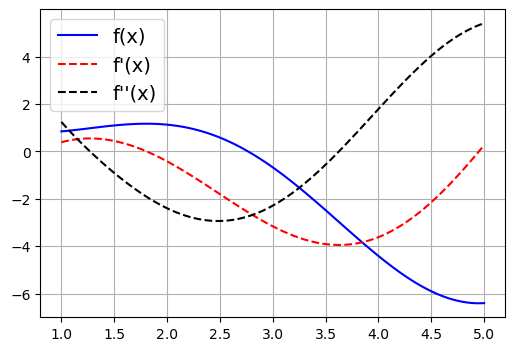

In [3]:
# h = dx = 1e-6
f = lambda x: np.sin(x)*x-np.log(x)
x = np.linspace(1,5,100) 
df = scipy.misc.derivative(f,x,dx=1e-6)
df2 = scipy.misc.derivative(f,x,dx=1e-6,n=2) 
plt.figure(figsize=(6,4))
plt.plot(x,f(x),'b',x,df,'r--',x,df2,'k--')
plt.legend(["f(x)","f'(x)","f''(x)"], prop={'size': 14}) 
plt.grid()
plt.show()

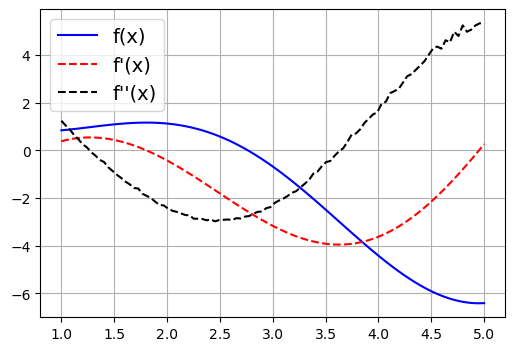

In [4]:
# h = dx = 1e-7
f = lambda x: np.sin(x)*x-np.log(x)
x = np.linspace(1,5,100) 
df = scipy.misc.derivative(f,x,dx=1e-7)
df2 = scipy.misc.derivative(f,x,dx=1e-7,n=2) 
plt.figure(figsize=(6,4))
plt.plot(x,f(x),'b',x,df,'r--',x,df2,'k--')
plt.legend(["f(x)","f'(x)","f''(x)"], prop={'size': 14}) 
plt.grid()
plt.show()

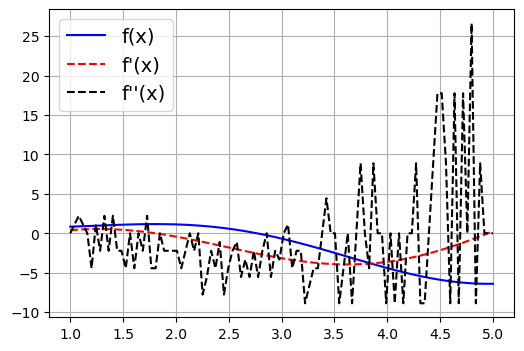

In [5]:
# h = dx = 1e-8 
f = lambda x: np.sin(x)*x-np.log(x)
x = np.linspace(1,5,100) 
df = scipy.misc.derivative(f,x,dx=1e-8)
df2 = scipy.misc.derivative(f,x,dx=1e-8,n=2) 
plt.figure(figsize=(6,4))
plt.plot(x,f(x),'b',x,df,'r--',x,df2,'k--')
plt.legend(["f(x)","f'(x)","f''(x)"], prop={'size': 14}) 
plt.grid()
plt.show()

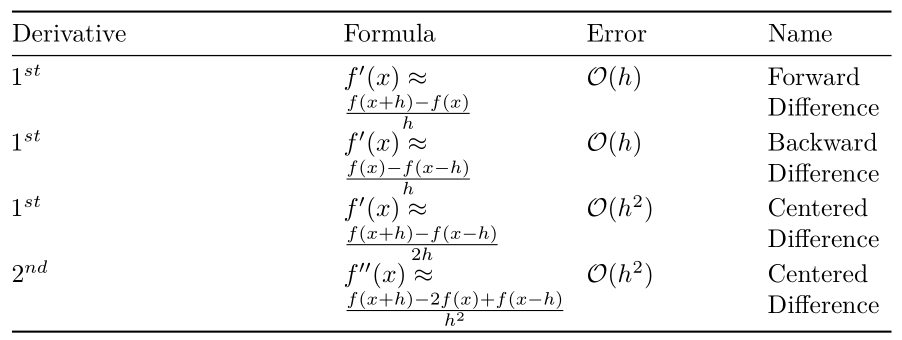 
$$\text{Zdroj: Sullivan (2020).}$$

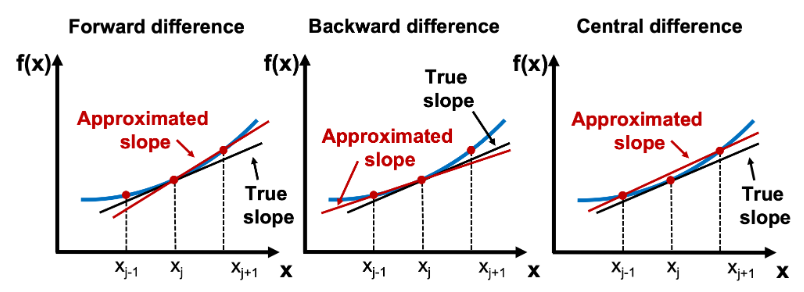 
$$\text{Zdroj: Kong et al. (2020).}$$


**Nasledujúci graf dobre ilustruje, že dopredná diferenčná formula je $\mathcal{O}\left(h^1\right)$ resp. že jej chyba je rádu $h^1$.** To znamená, že chyba aproximácie je proporciálna výrazu $h^1$ (je jeho násobkom) a zodpovedá tomu i graf, v ktorom je sklon pomyselnej priamky v log-log priestore rovný približne $1$.  

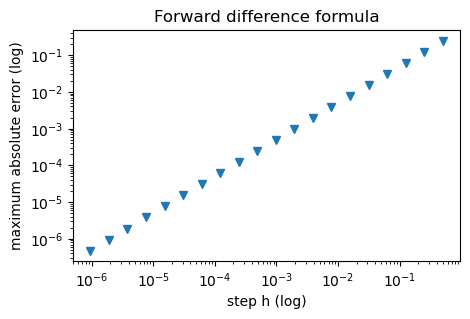

In [8]:
# Kong et al. (2020)
# define step size
h = 1
# define number of iterations to perform
iterations = 20 
# list to store our step sizes
step_size = [] 
# list to store max error for each step size
max_error = [] 

for i in range(iterations):
    # halve the step size
    h /= 2 
    # store this step size
    step_size.append(h) 
    # compute new grid
    x = np.arange(0, 2 * np.pi, h) 
    # compute function value at grid
    y = np.cos(x) 
    # compute vector of forward differences
    forward_diff = np.diff(y)/h 
    # compute corresponding grid
    x_diff = x[:-1] 
    # compute exact solution
    exact_solution = -np.sin(x_diff) 
    
    # Compute max error between 
    # numerical derivative and exact solution
    max_error.append(\
            max(abs(exact_solution - forward_diff)))

# produce log-log plot of max error versus step size 
plt.figure(figsize = (5, 3))
plt.loglog(step_size, max_error, 'v') 
plt.title('Forward difference formula')
plt.xlabel('step h (log)') 
plt.ylabel('maximum absolute error (log)')
plt.show()

***
<a id=lagrange></a>
 # <font color=brown> Aproximácia derivácií s využitím Lagrangeovej polynomiálnej reprezentácie </font> 

Nech $\{x_0,x_1,\ldots,x_n\}$ je $n+1$ rôznych bodov z intervalu $\langle a,b \rangle$ a predpokladajme navyše (nie nutne), že $x_{j+1}-x_j=h$ pre $j=0,1,2,\ldots,n-1$. Potom Lagrangeov interpolačný polynóm k funkcii $f(x)$, stupňa najviac $n$ v bodoch $\left([x_0,f(x_0)],[x_1,f(x_1)],\ldots.[x_n,f(x_n)]\right)$ má tvar 

\begin{equation*} \label{eq:lagrInterpPoly} \tag{5} 
p(x)=\displaystyle\sum\limits_{k=0}^{n}f(x_k)L_k(x),\quad \text{ kde } L_k(x)=\displaystyle\prod\limits_{i=0\\ i\neq k}^{n}\left(\dfrac{x-x_i}{x_k-x_i}\right)
\end{equation*} 

a 

\begin{equation*} \label{eq:lagrInterpPolyApprox} \tag{6} 
f(x)=p(x)+\dfrac{f^{(n+1)}\left(\xi(x)\right)(x-x_0)(x-x_1)\ldots(x-x_n)}{(n+1)!}
\end{equation*} 

pre nejaké $\xi(x)\in\langle a,b \rangle$. Preto 

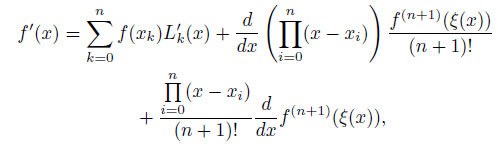 

a tiež 

\begin{equation*} \label{eq:lagrInterpPolyDerivApprox2} \tag{7} 
f'(x_l)=\sum\limits_{k=0}^{n}f(x_k)L_k'(x_l)+\left(\prod\limits_{i=0\\ i\neq l}^{n}(x_l-x_i)\right)\dfrac{f^{(n+1)}\left(\xi(x_l)\right)}{(n+1)!}, \quad \text{ pre } x=x_l.
\end{equation*} 

Tým pádom platí 

$$f'(x_l)\approx\sum\limits_{k=0}^{n}f(x_k)L_k'(x_l),$$ 

keďže výraz $\left(\prod\limits_{i=0\\ i\neq l}^{n}(x_l-x_i)\right)\dfrac{f^{(n+1)}\left(\xi(x_l)\right)}{(n+1)!}$ je vo všeobecnosti (zanedbateľne) malý. 

Vezmime napríklad $n=2$, $x_1=x_0+h$, $x_2=x_1+h=x_0+2h$. Potom na základe vzťahu $(7)$ dostaneme 

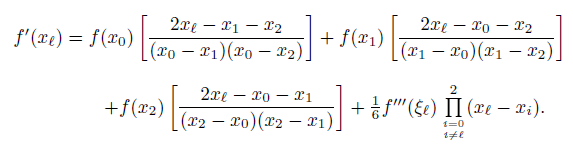 

Táto (základná) **trojbodová formula** je užitočná najmä vtedy, keď sú uzly rovnomerne rozmiestnené, tzn. $x_1=x_0+h$, $x_2=x_0+2h$ pre nejaké $h\neq0$. Ak v predošlom vzťahu (alebo v $(7)$) položíme $x_l=x_0$, $x_1=x_0+h$, $x_2=x_0+2h$, tak dostaneme 

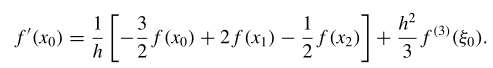 

Analogicky pre $x_l=x_1$ získame 

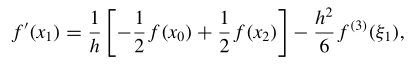 

pre $x_l=x_2$ máme 

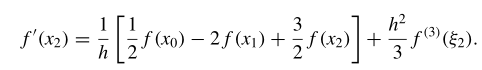 

Keďže $x_1=x_0+h$, $x_2=x_0+2h$, predošlé tri vzťahy je možné prepísať nasledovne: 

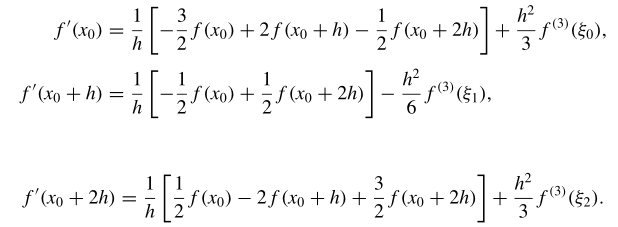 

Ak by sme v prostrednej (druhej) formule nahradili $x_0+h$ výrazom $x_0$ a v poslednej (tretej) formule nahradili $x_0+2h$ výrazom $x_0$, tak by sme dostali pre aproximáciu $f'(x_0)$ tieto tri vzťahy: 

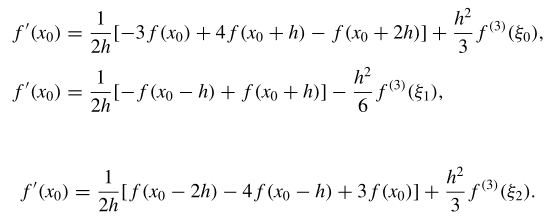 

Posledný uvedený vzťah by bolo možné dostať z prvej formuly (o dve vyššie) jednoduchým nahradením $h$ výrazom $-h$. V skutočnosti teda máme dva vzťahy: 

**Trojbodová koncová formula** 

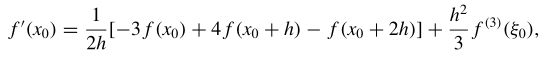 

kde $\xi_0$ leží medzi $x_0$ a $x_0+2h$. 

**Trojbodová stredová formula**

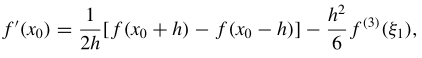 

kde $\xi_1$ leží medzi $x_0-h$ a $x_0+h$. 

**Aj keď sú chybové členy v oboch formulách $\mathcal{O}(h^2)$, tak chyba v stredovej formule je zhruba polovica chyby v koncovej formule.** Je to kvôli tomu, že stredová formula využíva informáciu resp. dáta z oboch strán bodu $x_0$ (t.j. z pravého i ľavého okolia bodu $x_0$). Všimnime si, že v stredovej formule potrebujeme vypočítať dve funkčné hodnoty funkcie $f$, zatiaľ čo v koncovej formule sú to tri funkčné hodnoty. Nasledujúci obrázok ilustruje aproximáciu derivácie pomocou stredovej formuly. Aproximácia pomocou koncovej formuly je vhodnejšia v blízkosti koncových (krajných) bodov intervalu, lebo informácia o $f$ mimo intervalu nemusí byť dostupná. 

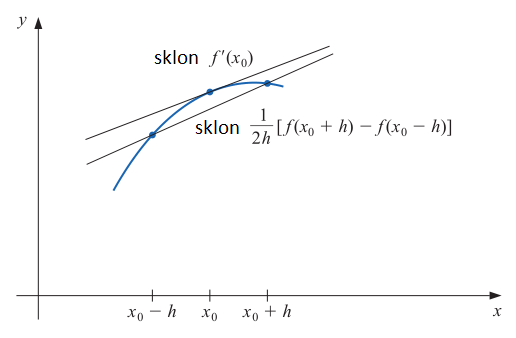 

Podobne, ak by sme uvažovali $5$ bodov (uzlov), t. j. $n=4$, bolo by možné odvodiť vzorce rádu $\mathcal{O}\left(h^4\right)$ - ide o rád chyby aproximácie derivácie (resp. rád zvyšku). 
 

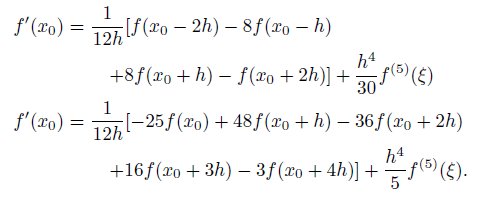 


--- 

#### <font color=blue> Príklad 2 </font> 
 
Vybrané hodnoty funkcie $f(x)=xe^x$ sú dané v tabuľke. Aplikujte trojbodové formule pre aproximáciu $f'(2.0)$. 

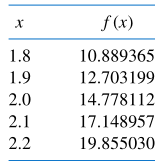 

<ins> Riešenie: </ins> 

Dáta v tabuľke nám umožňujú nájsť štyri rôzne aproximácie pre $f'(2.0)$ pomocou trojbodových formúl. Môžeme aplikovať koncovú formulu s $h=0.1$, $h=-0.1$ a stredovú formulu s $h=0.1$, $h=0.2$. 

Aplikovaním koncovej formuly s $h=0.1$ dostaneme 

$$\dfrac{1}{0.2}\left[-3f(2.0)+4f(2.1)-f(2.2)\right]=5\left[-3(14.778112)+4(17.148957)-19.855030\right]=22.032310,$$ 

pre $h=-0.1$ máme výsledok $22.054525$. 

Aplikovaním stredovej formuly s $h=0.1$ dostaneme 

$$\dfrac{1}{0.2}\left[f(2.1)-f(1.9)\right]=5(17.148957-12.7703199)=22.228790,$$

pre $h=0.2$ máme výsledok $22.414163$. 

Skutočná hodnota derivácie je $f'(2.0)=(2+1)e^2=22.167168$, takže chyby aproximácie sú nasledovné: 

$$\text{Koncová formula s } h=0.1: \quad 1.35\times10^{-1};$$

$$\text{Koncová formula s } h=-0.1: \quad 1.13\times10^{-1};$$

$$\text{Stredová formula s } h=0.1: \quad -6.16\times10^{-2};$$

$$\text{Stredová formula s } h=0.2: \quad -2.47\times10^{-1}.$$

--- 

---

#### Poznámka 2 

Uvedomme si, že numerické derivovanie je zaťažené tzv. zaokrúhľovacou chybou (konečná resp. obmedzená strojová presnosť) a tiež chybou vyplývajúcou z interpolácie (napr. pomocou Lagrangeovho interpolačného polynómu). 

--- 

***
<a id=chyby></a>
 # <font color=brown> Analýza chýb </font> 

Pri numerickom výpočte derivácie hrá významnú úlohu aj zaokrúhľovacia chyba a to jednak v hodnotách funkcie $f$ (t.j. vo vstupných dátach) a jednak v samotnom vyčíslení vzorca (t.j. pri výpočte).  
Jeden z problémov numerického derivovania je ten, že zaokrúhľovacia chyba môže byť veľká pre malé $h$ (viď Príklad 2 hore). Totiž v počítači, $f(x_0+h)=\tilde{f}(x_0+h)+e(x_0+h)$ a $f(x_0)=\tilde{f}(x_0)+e(x_0)$, kde $e(x_0+h)$, $e(x_0)$ sú zaokrúhľovacie chyby pri výpočte $f(x_0+h)$ a $f(x_0)$, ktoré závisia od počtu (platných) číslic v počítači. 

Uvažujme dopredný diferenčný vzorec 

$$f'(x_0)=\dfrac{f(x_0+h)-f(x_0)}{h}-\dfrac{h}{2}f''\left(\xi(x)\right).$$ 

Pre všetky $x$ z malého okolia $x_0$ predpokladajme, že platí $\left|e(x)\right|\le\varepsilon\left|f(x)\right|$ pre nejakú relatívnu chybu $\varepsilon$; ďalej nech $\left|f(x)\right|\le M_0$ pre nejakú konštantu $M_0$ a taktiež nech $\left|f''(x)\right|\le M_2$ pre nejakú konštantu $M_2$. Zohľadnením zavedených ohraničení a opakovaným použitím trojuholníkovej nerovnosti dostávame 

\begin{equation*} \label{eq:error1} \tag{8} 
\left|f'(x_0)-\dfrac{\tilde{f}(x_0+h)-\tilde{f}(x_0)}{h}\right|\le\left|\dfrac{e(x_0+h)-e(x_0)}{h}\right|+\dfrac{h}{2}M_2\le\dfrac{2\varepsilon M_0}{h}+\dfrac{hM_2}{2}=E(h),
\end{equation*} 

kde $\varepsilon$ je ľubovoľné číslo také, ktoré spĺňa $\left|e(x)\right|\le\varepsilon\left|f(x)\right|$ pre všetky uvažované $x$. To vlastne znamená, že celková chyba $E(h)$ je ohraničená krivkou ako to ukazuje nasledujúci obrázok (ilustrácia hranice celkovej chyby, t. j. zaokrúhlenie + aproximácia resp. zanedbanie členov v doprednej diferenciácii). Z grafu je vidieť, že pre malé $h$ môže byť chyba veľká. 

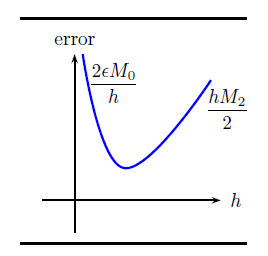 
$$\text{Zdroj: Ackleh et al. (2009).}$$ 

Môžeme si všimnúť, že hranica pre aproximačnú chybu (zanedbanie členov) t. j. $\dfrac{hM_2}{2}$ ide k $0$ pre $h\to0$. Naproti tomu hranica pre zaokrúhľovaciu chybu t. j. $\dfrac{2\varepsilon M_0}{h}$ ide do nekonečna pre $h\to0$. Pre malé $h$ ide teda o zle podmienenú úlohu. Totiž malé zmeny $e(x_0+h)$, $e(x_0)$ vo vstupných dátach vyvolajú veľkú zmenu zaokrúhľovacej chyby a následne tiež výsledku $\tilde{f}'(x)$, čo je vlastne aproximácia požadovanej derivácie. 


---

#### Poznámka 3 

Alternatívou k doprednej diferencii je tzv. **_spätný diferenčný vzorec_** (spätná diferencia) v tvare 

$$f'(x_0)=\dfrac{f(x_0)-f(x_0-h)}{h}+\dfrac{h}{2}f''\left(\xi(x)\right).$$

--- 

--- 

#### <font color=blue> Príklad 3 </font> 
 
(S presnosťou na 10 číslic) $f(x)=\ln x$, $1/3=f'(3)\approx\dfrac{\ln(3+h)-\ln(3)}{h}$. 

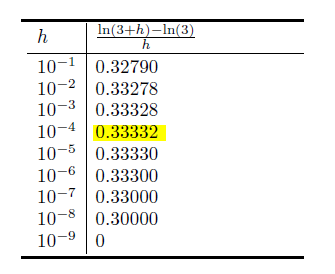 

Všimnime si, že $f''(x)=-\dfrac{1}{x^2}$ a $M_2=\mathrm{max}\,\left|f''(\xi)\right|\approx\dfrac{1}{9}$. Podľa $(8)$ predpokladajme, že chyba $E(h)$ je $\dfrac{2\varepsilon M_0}{h}+\dfrac{hM_2}{2}$. Minimálna chyba nastáva pre $E'(h)=0$, čo dáva optimálne $h_{opt}\approx\sqrt{36\varepsilon}$. Pri presnosti 10 platných číslic je $\varepsilon\approx5\times10^{-10}$. Preto $h_{opt}\approx10^{-4}$. 


In [64]:
[{h:(np.log(3+h)-np.log(3))/h} for h in (10**(-p) for p in range(1, 10))]

[{0.1: 0.3278982282299081},
 {0.01: 0.33277900926744763},
 {0.001: 0.3332777901201567},
 {0.0001: 0.3333277779016264},
 {1e-05: 0.33333277777991555},
 {1e-06: 0.33333327764673015},
 {1e-07: 0.3333333253863202},
 {1e-08: 0.333333316504536},
 {1e-09: 0.333333360913457}]

--- 

Ak by sme použili kalkulus na minimalizáciu výrazu $E(h)$ (vpravo) v $(8)$ vzhľadom na $h$, dostali by sme $h_{opt}=\dfrac{2\sqrt{\varepsilon M_0}}{\sqrt{M_2}}$ s minimálnou hranicou chyby $E(h_{opt})=2\sqrt{M_0M_2}\sqrt{\varepsilon}$ (minimum funkcie znázornenej na obrázku vyššie). 

Hoci pravý člen v $(8)$ je iba hranicou, vidíme, že $h_{opt}$ poskytuje dobrý odhad pre optimálny krok v delenom rozdiele (diferencii) a $E(h_{opt})$ poskytuje dobrý odhad pre minimálnu dosiahnuteľnú chybu. Konkrétne minimálna dosiahnuteľná chyba je $\mathcal{O}(\sqrt{\varepsilon})$ a optimálne $h$ je tiež $\mathcal{O}(\sqrt{\varepsilon})$, a to ako v odhadoch, tak aj v numerických experimentoch v Príklade 3.

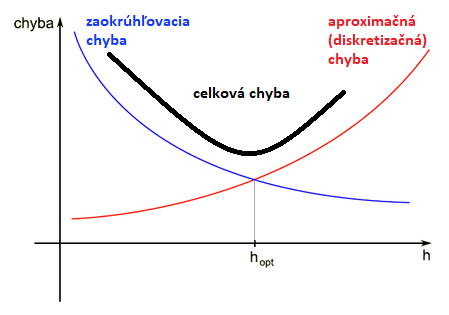

<font color=orange> Analyticky (využitím diferenciálneho kalkulu) overte, že $h_{opt}=\dfrac{2\sqrt{\varepsilon M_0}}{\sqrt{M_2}}$ a $E(h_{opt})=2\sqrt{M_0M_2}\sqrt{\varepsilon}$. </font> 


<font color=purple> EXTRA: Využite vhodnú knižnicu v Pythone a naprogramujte analytický prístup pre nájdenie $h_{opt}$. Správny a dostatočne okomentovaný kód môže byť ohodnotený jedným bonusovým bodom. </font>  

---

#### Poznámka 4 

* Použitím vzorcov vyššieho rádu je možné dosiahnúť menšiu hranicu pre celkovú chybu, avšak za cenu určitých komplikácií. Konkrétne, ak by zaokrúhľovacia chyba bola $\mathcal{O}(1/h)$ a chyba aproximácie (zanedbania členov) $\mathcal{O}(h^n)$, potom by optimálne $h$ bolo $\mathcal{O}\left(\varepsilon^{1/(n+1)}\right)$ a minimálna dosiahnuteľná hranica pre chybu by bola $\mathcal{O}\left(\varepsilon^{n/(n+1)}\right)$. 


* Na druhej strane, podobné chovanie ohľadom chýb (ako sme uviedli vyššie) vykazujú i ostatné vzorce pre numerické derivovanie. Tzn., že **pre krok $h$ blízky $h_{opt}$ je numerický výpočet derivácie zle podmienená úloha**: nepatrné zmenšenie kroku vyvolá značný nárast chyby (viď graf uvedený vyššie). 

--- 

---

#### Poznámka 5 

Numerický výpočet parciálnej derivácie sa zrealizuje nasledovne: Ak sa derivuje podľa premennej $x_i$, na ostatné premenné $x_j\neq x_i$ sa v tej chvíli neprihliada a niektorý z vyššie uvedených vzorcov sa aplikuje iba na $x_i$. Napr. pomocou doprednej diferencie dostaneme 

$$\dfrac{\partial f(x_1,x_2)}{\partial x_2}\approx\dfrac{f(x_1,x_2+h)-f(x_1,x_2)}{h}.$$

--- 

***
<a id=richardson></a>
 # <font color=brown> Richardsonova extrapolácia </font> 

Približný výpočet derivácie je možné efektívne spresniť technikou známou ako **_Richardsonova extrapolácia_**. Je to univerzálny postup umožnujúci pomocou základnej metódy nižšej presnosti vytvárať metódy vyššej presnosti. Ukážeme si ako presne to funguje. 

**Extrapoláciu možno použiť vždy, keď je známe, že aproximačná technika má chybový člen s predvídateľným tvarom, ktorý závisí od parametra, zvyčajne od veľkosti kroku h.**

Predpokladajme, že základná metóda je reprezentovaná funkciou $F(h)$ s parametrom $h$. Metódou $F$ dokážeme vypočítať hodnoty $F(h)$ pre malé $h>0$. Našim cieľom je čo najpresnejšie aproximovať hodnotu $F(0)$, ktorú však priamo z predpisu $F$ určiť nedokážeme. 

Predpokladajme, že funkciu $F(h)$ je možné vyjadriť v tvare mocninového rozvoja 

\begin{equation*} \label{eq:RichExtPowSerExp} \tag{9} 
F(h)=a_0+a_1h^2+a_2h^4+a_3h^6+\ldots, \quad h\in(0,h_0\rangle.
\end{equation*} 

Pre malé $h$ je zrejme $F(h)$ dobrou aproximáciou $F(0)=a_0$. Pokúsime sa ale nájsť lepšiu aproximáciu pre $a_0$. Začneme tým, že vypočítame $F\left(\frac{h}{2}\right)$. Podľa \eqref{eq:RichExtPowSerExp} platí 

\begin{equation*} \label{eq:RichExtPowSerExp2} \tag{10} 
F\left(\frac{h}{2}\right)=a_0+a_1\left(\frac{h}{2}\right)^2+a_2\left(\frac{h}{2}\right)^4+a_3\left(\frac{h}{2}\right)^6+\ldots 
\end{equation*} 

Najväčšiu chybu vo výraze $a_0-F(h)$ i $a_0-F(\frac{h}{2})$ predstavuje člen obsahujúci druhú mocninu $h$. Zbavíme sa ho tak, že od štvornásobku rovnice \eqref{eq:RichExtPowSerExp2} odčítame rovnicu \eqref{eq:RichExtPowSerExp} a výsledok vynásobime jednou tretinou. Takto dostaneme 

\begin{equation*} \label{eq:RichExtPowSerExp3} \tag{11} 
    F_2(h):=\dfrac{4F\left(\frac{h}{2}\right)-F(h)}{3}=a_0+a_2^{(2)}h^4+a_3^{(2)}h^6+\ldots 
\end{equation*}

Ľahko overíme (premyslite si!), že $\left|a_j^{(2)}\right|<\left|a_j\right|$, $j=2,3,\ldots$ . Teda $F_2(h)$ je lepšou aproximáciou pre $a_0$ než $F(h)$, keďže $a_0-F_2(h)$ začína až štvrtou mocninou $h$. Dostali sme teda metódu $F_2$, ktorá je (pre dostatočne malé $h$) lepšia (presnejšia) než pôvodná metóda $F$. Naviac, keďže $F_2(h)\approx F(0)$ je vypočítaná pomocou hodnôt funkcie $F$ pre $h$ a $\frac{h}{2}$, predstavuje $F_2(h)$ extrapoláciu funkcie $F$ do nuly. 


<font color=orange> Overte, že $F_2(h)$ predstavuje extrapoláciu funkcie $F$ do nuly. Presnejšie teda overte, že $F_2(h)=P_1(0)$ kde $P_1(t)$ je lineárny interpolačný polynóm prechádzajúci bodmi $\left[\left(\frac{h}{2}\right)^2,F\left(\frac{h}{2}\right)\right]$, $\left[h^2,F(h)\right]$. </font> 

Podobným postupom, ako je naznačený vyššie, je možné odstrániť z $F_2(h)$ člen obsahujúci štvrtú mocninu $h$ a získať tak ešte presnejšiu aproximáciu pre $F(0)$. Najprv teda vypočítame $F_2\left(\frac{h}{2}\right)$ podľa $(11)$, t. j. 

\begin{equation*} \label{eq:RichExtPowSerExp4} \tag{12} 
    F_2\left(\frac{h}{2}\right)=a_0+a_2^{(2)}\left(\frac{h}{2}\right)^4+a_3^{(2)}\left(\frac{h}{2}\right)^6+\ldots 
\end{equation*} 

Teraz vynásobime rovnicu $(12)$ číslom 16, odčítame od toho $(11)$ a výsledok vynásobime jednou pätnástinou. Takto dostaneme metódu $F_3$, ktorá je pre zvolené $h$ definovaná predpisom 

\begin{equation*} \label{eq:RichExtPowSerExp5} \tag{13} 
    F_3(h):=\dfrac{16F_2\left(\frac{h}{2}\right)-F_2(h)}{15}=a_0+a_3^{(3)}h^6+\ldots 
\end{equation*} 

pričom platí $\left|a_j^{(3)}\right|<\left|a_j^{(2)}\right|<\left|a_j\right|$ pre $j=3,4,\ldots$. Všimnime si, že k tomu, aby sme mohli vypočítať $F_2\left(\frac{h}{2}\right)$, potrebujeme najprv určiť $F\left(\frac{h}{4}\right)$. 

V naznačenom postupe by sme mohli pokračovať a získavať stále presnejšie metódy, pre ktoré by platilo 

\begin{equation*} \label{eq:RichExtPowSerExp6} \tag{14} 
    F_{i+1}(h)=\dfrac{4^iF_i\left(\frac{h}{2}\right)-F_i(h)}{4^i-1}=a_0+a_{i+1}^{(i+1)}h^{2i+2}+\ldots, \quad i=1,2,\ldots 
\end{equation*} 

pričom $F_1(h)=F(h)$. Pre koeficienty rozvoja pritom platí $\left|a_{j}^{(i+1)}\right|<\left|a_j\right|$ pre $j=i+1,i+2,\ldots$ 

Ďalej nech $h_s=h/2^s$, $s=0,1,\ldots$. Keďže $F_i(h)=a_0+a_i^{(i)}h^{2i}+a_{i+1}^{(i)}h^{2i+2}+\ldots$, tak ľahko odvodíme (premyslite to!), že platí 

\begin{equation*} \label{eq:RichExtIneq1} \tag{15} 
    \left|F_i(h_s)-a_0\right|\le C_ih_s^{2i}, \quad s=0,1,\ldots, \quad i=0,1,\ldots,
\end{equation*} 

kde $C_i$ sú konštanty nezávislé od $h_s$. Preto hovoríme, že $F_i(h_s)$ je aproximáciou pre $F(0)$ rádu $h_i^{2i}$ a píšeme $F_i(h_s)=F(0)+\mathcal{O}\left(h_s^{2i}\right)$. 

Výpočet pomocou prezentovanej schémy (Richardsonovej extrapolácie) je možné prehľadne znázorniť v tabuľke 

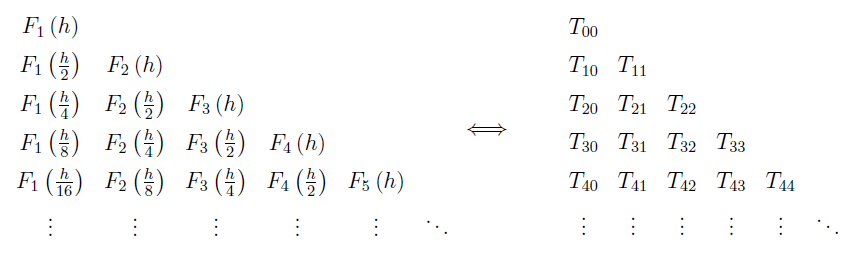 
$$\text{Zdroj: Čermák (2020).}$$ 

Tabuľka sa vypĺňa po riadkoch. Zrejme 

\begin{equation*} \label{eq:RichExtTabSteps1} \tag{16} 
    T_{si}=F_{i+1}\left(h/2^{s-i}\right), \quad F_i(h_s)=T_{i+s-1,i-1}. 
\end{equation*} 

Prvok $T_{s0}$ v prvom stĺpci tabuľky vypočítame pomocou základnej metódy $F=F_1$, 

\begin{equation*} \label{eq:RichExtTabSteps2} \tag{17} 
    T_{s0}=F\left(h/2^{s}\right), \quad s=0,1,\ldots 
\end{equation*} 

a ďalšie prvky v tomto riadku počítame v súlade s \eqref{eq:RichExtPowSerExp6} podľa predpisu 

\begin{equation*} \label{eq:RichExtTabSteps3} \tag{18} 
    T_{si}:=\dfrac{4^iT_{s,i-1}-T_{s-1,i-1}}{4^i-1}=T_{s,i-1}+\dfrac{T_{s,i-1}-T_{s-1,i-1}}{4^i-1}, \quad s=1,2,\ldots,s.  
\end{equation*}

Výpočet ukončíme a $T_{si}$ považujeme za dostatočne presnú aproximáciu pre $F(0)$, ak platí 

\begin{equation*} \label{eq:RichExtIneq2} \tag{19} 
    \left|T_{si}-T_{s,i-1}\right|<\mathrm{max}\left(\varepsilon_r\left|T_{si}\right|,\varepsilon_a\right),   
\end{equation*}

kde $\varepsilon_r$ je požadovaná relatívna presnosť a $\varepsilon_a$ je požadovaná absolútna presnosť. Podľa \eqref{eq:RichExtIneq1} a \eqref{eq:RichExtTabSteps1} máme 

\begin{equation*} \label{eq:RichExtIneq3} \tag{20} 
    \left|T_{si}-F(0)\right|\le C_{i+1}h_{i-1}^{2i+2}, \quad s=0,1,\ldots, \quad i =0,1,\ldots
\end{equation*}


--- 

#### <font color=blue> Príklad 4 </font>  

Použijeme Richardsonovu extrapoláciu na spresnenie výpočtu derivácie podľa vzťahu 

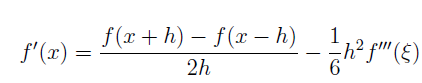 

Pokiaľ má funkcia $f$ dostatočný počet spojitých derivácií, potom 

\begin{equation*} \label{eq:RichExtPowSerExp7} \tag{21} 
    F(h):=\dfrac{f(x+h)-f(x-h)}{2h}=f'(x)+\dfrac{f^{(3)}(x)}{3!}h^2+\dfrac{f^{(5)}(x)}{5!}h^4+\ldots,  
\end{equation*} 

takže $F(h)$ je v tvare $(9)$. 

Počítajme deriváciu funkcie $f(x)=\cos(x)$ pre $x=1$. Zvoľme napr. $h=0.8$ a výpočet ukončíme, keď bude splnená podmienka $(19)$ pre $\varepsilon_r=\varepsilon_a=10^{-5}$. V nasledujúcej tabuľke značíme $h_s=h/2^s$, prvky $T_{s0}$ počítame zo vzťahu 

$$T_{s0}=\dfrac{\cos(1+h_s)-\cos(1-h_s)}{2h_s},$$

prvky $T_{s1}$ a $T_{s2}$ v ďalších stĺpcoch počítame podľa $(18)$. Čísla v tabuľke sú zaokrúhlené na 6 cifier. Keďže $\left|T_{32}-T_{31}\right|<10^{-5}$, považujeme $T_{32}=-0.841471$ za približnú hodnotu $f'(1)$. Presná hodnota $f'(1)=-\sin(1)\doteq-0.84147098$, preto $T_{32}$ má všetky cifry platné. 

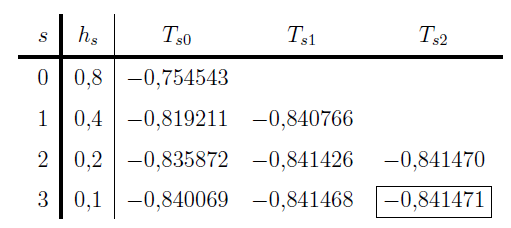
$$\text{Zdroj: Čermák (2020).}$$ 

---

<font color=orange> Naprogramujte výpočty (resp. tabuľku) z Príkladu 4 v Pythone. Pokúste sa určiť hodnotu $f'(1)$ čo najpresnejšie, s využitím vhodnej Python-ovskej knižnice. </font> 

---

#### Poznámka 6 

Richardsonovu extrapoláciu je možné aplikovať na základnú metódu $F$ aj v prípade, keď má funkcia $F(h)$ všeobecný rozvoj v tvare 

\begin{equation*} \label{eq:RichExtPowSerExp8} \tag{22} 
    F(h)=a_0+a_1h^{p_1}+a_2h^{p_2}+a_3h^{p_3}+\ldots,  
\end{equation*} 

kde $1\le p_1 < p_2 < p_3 < \ldots $ sú prirodzené čísla. V tom prípade metódu $F_{i+1}$ definujeme nasledovne: 

\begin{equation*} \label{eq:RichExtPowSerExp9} \tag{23} 
    F_{i+1}(h)=\dfrac{2^{p_i}F_{i}\left(\frac{h}{2}\right)-F_{i}\left(h\right)}{2^{p_i}-1}=a_0+a_{i+1}^{(i+1)}h^{p_i+1}+\ldots, \quad i=1,2,\ldots,    
\end{equation*} 

a $T_{si}$ sa počíta podľa vzťahu 

\begin{equation*} \label{eq:RichExtTabSteps4} \tag{24} 
    T_{si}:=\dfrac{2^{p_i}T_{s,i-1}-T_{s-1,i-1}}{2^{p_i}-1}=T_{s,i-1}+\dfrac{T_{s,i-1}-T_{s-1,i-1}}{2^{p_i}-1}, \quad s=1,2,\ldots,s.  
\end{equation*}

Zrejme $F_{i}(h)-F(0)=a_{i}^{(i)}h^{p_i}+\ldots$, a teda $F_{i}(h)$ je aproximácia rádu $h^{p_i}$ pre $F(0)$. Špeciálne pre $p_i=2i$ dostaneme prvotne uvažovaný prípad - pozri vzťahy $(12)$, $(14)$, $(18)$. 

--- 

--- 

#### <font color=blue> Príklad 5 </font>  

Richardsonovou extrapoláciou spresníme výpočet derivácie podľa vzorca 

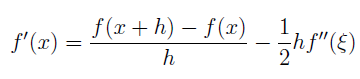 

Z Taylorovej vety máme 

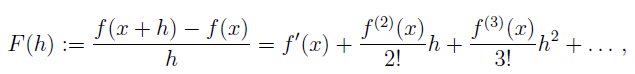 

čo odpovedá vyjadreniu $(22)$ pre $p_i=i$. 

Riešiť budeme rovnakú úlohu ako v Príklade 4. Tentokrát dostaneme požadovanú presnosť až pre $T_{44}$. 

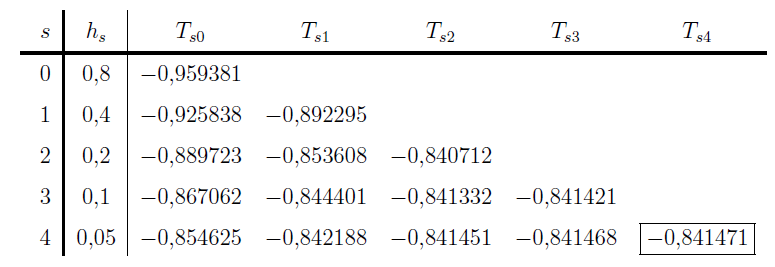 
$$\text{Zdroj: Čermák (2020).}$$ 

Richardsonova extrapolácia je menej účinná: zatiaľ čo pre vzorec z Príkladu 4 je aproximácia $T_{32}$ rádu $h^6$, pre vzorec z tohto príkladu je $T_{44}$ aproximácia rádu $h^5$ a k dosiahnutiu požadovanej presnosti bolo potrebné zvoliť menšie $h_s$. 

---

<font color=purple> EXTRA: Naprogramujte výpočty (resp. tabuľku) z Príkladu 5 v Pythone. Za správne a okomentované riešenie je možné získať jeden bonusový bod. </font> 

***
<a id=zdroje></a>
 # <font color=brown> Použité zdroje</font> 

* Ackleh, A.S., Allen, E.J., Kearfott, R.B., & Seshaiyer, P. (2009). Classical and Modern Numerical Analysis: Theory, Methods and Practice. Chapman and Hall/CRC. 


* Burden, R. L., & Faires, J. D. (2011). Numerical analysis. Brooks/Cole, Cengage Learning. 


* Čermák, L. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Fajmon, B., Hlavičková, I., Novák, M., Vítovec, J. (2014). Numerická matematika a pravděpodobnost. Ústav matematiky FEKT VUT v Brně. 


* Gezerlis, A. (2020). Numerical methods in physics with Python. Cambridge University Press. 


* Gilli, M., Maringer, D., Schumann, E. (2019). Numerical Methods and Optimization in Finance. Elsevier/Academic Press. 


* Kiusalaas, J. (2013). Numerical Methods in Engineering with Python 3. Cambridge University Press, USA.


* Kincaid, D., & Cheney, E. W. (2002). Numerical analysis: Mathematics of scientific computing. Pacific Grove, CA: Brooks/Cole.


* Kiseľák, J. (2020). Základy numerických metód. ÚMV PF UPJŠ. 


* Kong, Q., Siauw, T., Bayen, A. (2020). [Python Programming and Numerical Methods: A Guide for Engineers and Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html). Academic Press. 


* Oršanský, P., Ftorek B. (2021). Štatistické a numerické metódy. EDIS - UNIZA.


* Růžičková, I. & Hlavička, R. (2020). Numerické metody. Ústav matematiky FSI VUT v Brně. 


* Sauer, T. (2011). Numerical Analysis. Addison-Wesley Publishing Company, USA. 


* Sullivan, E. (2020). Numerical Methods: An Inquiry-Based Approach With Python. Faculty Publications. 